In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost as xg
from sklearn import metrics
import datetime

In [111]:
df = pd.read_csv('/content/Data.csv')
df.head()

,Unnamed: 0,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,0,1,Agra,Achnera,Potato,Other,FAQ,300,400,365,31 Jan 2011
1,1,2,Agra,Achnera,Potato,Other,FAQ,300,400,370,30 Jan 2011
2,2,3,Agra,Achnera,Potato,Other,FAQ,300,400,380,29 Jan 2011
3,3,4,Agra,Achnera,Potato,Other,FAQ,300,400,375,28 Jan 2011
4,4,5,Agra,Achnera,Potato,Other,FAQ,300,390,360,26 Jan 2011


In [112]:
df['Price Date'] = df['Price Date'].apply(lambda x: datetime.datetime.strptime(x, "%d %b %Y"))
df = df.sort_values(['Price Date'], ascending=True)
df.head()

,Unnamed: 0,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
113,113,25,Agra,Jagnair,Potato,Other,FAQ,330,400,350,2011-01-01
26,26,27,Agra,Achnera,Potato,Other,FAQ,320,400,370,2011-01-01
88,88,24,Agra,Fatehpur Sikri,Potato,Other,FAQ,290,315,300,2011-01-01
134,134,21,Agra,Khairagarh,Potato,Other,FAQ,500,600,550,2011-01-01
25,25,26,Agra,Achnera,Potato,Other,FAQ,300,400,360,2011-01-02


In [67]:
print(df.dtypes)
df.shape

Unnamed: 0                            int64
Sl no.                                int64
District Name                        object
Market Name                          object
Commodity                            object
Variety                              object
Grade                                object
Min Price (Rs./Quintal)               int64
Max Price (Rs./Quintal)               int64
Modal Price (Rs./Quintal)             int64
Price Date                   datetime64[ns]
dtype: object


(14806, 11)

In [68]:

df.describe()

,Unnamed: 0,Sl no.,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal)
count,14806.000000,14806.000000,14806.000000,14806.000000,14806.000000
mean,7402.500000,12.350939,679.884979,769.840673,838.016277
std,4274.268378,7.325576,498.112289,532.838595,453.052665
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,3701.250000,6.000000,350.000000,440.000000,490.000000
50%,7402.500000,12.000000,600.000000,700.000000,780.000000
75%,11103.750000,18.000000,910.000000,1050.000000,1050.000000
max,14805.000000,34.000000,3750.000000,4750.000000,10100.000000


In [69]:
df.columns

Index(['Unnamed: 0', 'Sl no.', 'District Name', 'Market Name', 'Commodity',
       'Variety', 'Grade', 'Min Price (Rs./Quintal)',
       'Max Price (Rs./Quintal)', 'Modal Price (Rs./Quintal)', 'Price Date'],
      dtype='object')

In [70]:
df.nunique()

Unnamed: 0                   14806
Sl no.                          34
District Name                    1
Market Name                      8
Commodity                        1
Variety                          6
Grade                            1
Min Price (Rs./Quintal)        301
Max Price (Rs./Quintal)        309
Modal Price (Rs./Quintal)      466
Price Date                    3958
dtype: int64

In [71]:
Data = df.drop(['Unnamed: 0', 'Sl no.', 'District Name', 'Commodity',
       'Grade'], axis=1)
Data.head()

,Market Name,Variety,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
113,Jagnair,Other,330,400,350,2011-01-01
26,Achnera,Other,320,400,370,2011-01-01
88,Fatehpur Sikri,Other,290,315,300,2011-01-01
134,Khairagarh,Other,500,600,550,2011-01-01
25,Achnera,Other,300,400,360,2011-01-02


In [72]:
Data.columns

Index(['Market Name', 'Variety', 'Min Price (Rs./Quintal)',
       'Max Price (Rs./Quintal)', 'Modal Price (Rs./Quintal)', 'Price Date'],
      dtype='object')

In [73]:
Data['Variety'].unique()

array(['Other', 'Desi', 'Potato', 'F.A.Q.', 'Local', 'Chips'],
      dtype=object)

In [78]:
Data.mode()

,Market Name,Variety,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,Agra,Desi,0.0,0.0,1000.0,2017-03-07
1,NaN,NaN,NaN,NaN,NaN,2017-06-09
2,NaN,NaN,NaN,NaN,NaN,2017-06-12
3,NaN,NaN,NaN,NaN,NaN,2017-06-13
4,NaN,NaN,NaN,NaN,NaN,2017-06-14
...,...,...,...,...,...,...
291,NaN,NaN,NaN,NaN,NaN,2020-06-24
292,NaN,NaN,NaN,NaN,NaN,2020-06-27
293,NaN,NaN,NaN,NaN,NaN,2020-06-29
294,NaN,NaN,NaN,NaN,NaN,2020-06-30


In [79]:
Data.isnull().sum()

Market Name                  0
Variety                      0
Min Price (Rs./Quintal)      0
Max Price (Rs./Quintal)      0
Modal Price (Rs./Quintal)    0
Price Date                   0
dtype: int64

In [80]:
(Data['Min Price (Rs./Quintal)'] == 0).sum()

2043

In [81]:
(Data['Max Price (Rs./Quintal)'] == 0).sum()

2047

In [82]:
(Data['Modal Price (Rs./Quintal)'] == 0).sum()

2

In [83]:
Data.replace(to_replace=0,value=np.nan,inplace=True)

In [84]:
Data.isnull().sum()

Market Name                     0
Variety                         0
Min Price (Rs./Quintal)      2043
Max Price (Rs./Quintal)      2047
Modal Price (Rs./Quintal)       2
Price Date                      0
dtype: int64

In [85]:
Data.fillna(method ='pad',inplace=True)

In [86]:
Data.mode()

,Market Name,Variety,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,Agra,Desi,900.0,1100.0,1000.0,2017-03-07
1,NaN,NaN,NaN,NaN,NaN,2017-06-09
2,NaN,NaN,NaN,NaN,NaN,2017-06-12
3,NaN,NaN,NaN,NaN,NaN,2017-06-13
4,NaN,NaN,NaN,NaN,NaN,2017-06-14
...,...,...,...,...,...,...
291,NaN,NaN,NaN,NaN,NaN,2020-06-24
292,NaN,NaN,NaN,NaN,NaN,2020-06-27
293,NaN,NaN,NaN,NaN,NaN,2020-06-29
294,NaN,NaN,NaN,NaN,NaN,2020-06-30


In [87]:
Data.isnull().sum()

Market Name                  0
Variety                      0
Min Price (Rs./Quintal)      0
Max Price (Rs./Quintal)      0
Modal Price (Rs./Quintal)    0
Price Date                   0
dtype: int64

In [88]:
corelation = Data.corr()

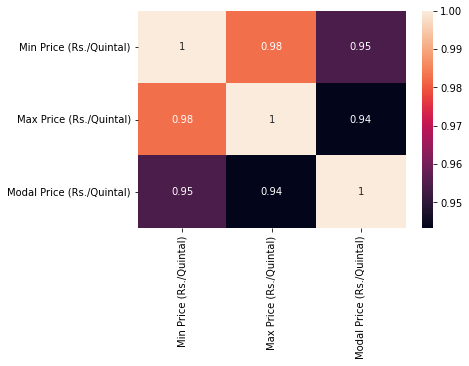

In [89]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

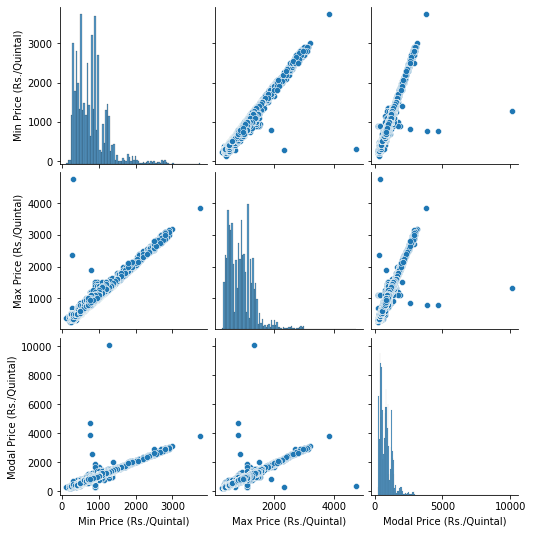

In [90]:
sns.pairplot(Data)

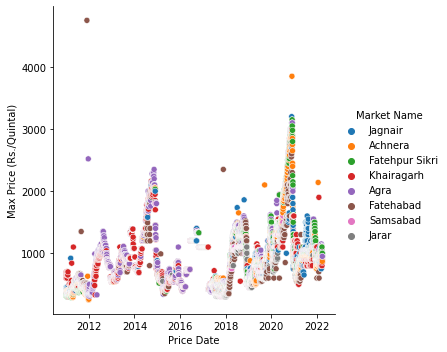

In [91]:
sns.relplot(data=Data, x= 'Price Date', y= 'Max Price (Rs./Quintal)', hue='Market Name')

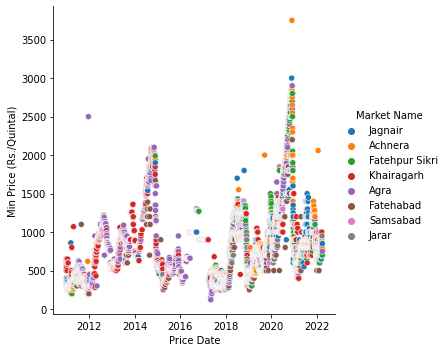

In [92]:
sns.relplot(data=Data, x= 'Price Date', y= 'Min Price (Rs./Quintal)', hue='Market Name')

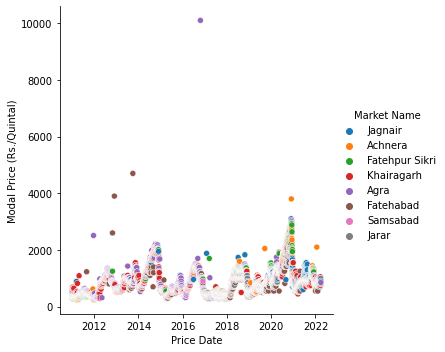

In [93]:
sns.relplot(data=Data, x= 'Price Date', y='Modal Price (Rs./Quintal)', hue='Market Name')

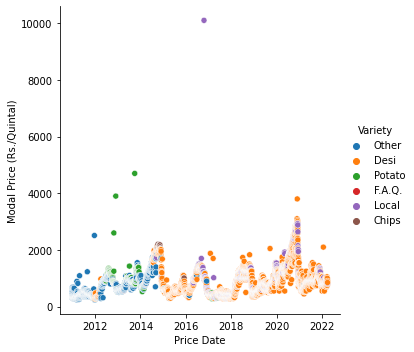

In [94]:
sns.relplot(data=Data, x= 'Price Date', y='Modal Price (Rs./Quintal)', hue='Variety')

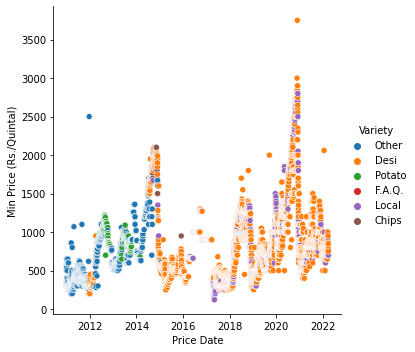

In [95]:
sns.relplot(data=Data, x= 'Price Date', y='Min Price (Rs./Quintal)', hue='Variety')

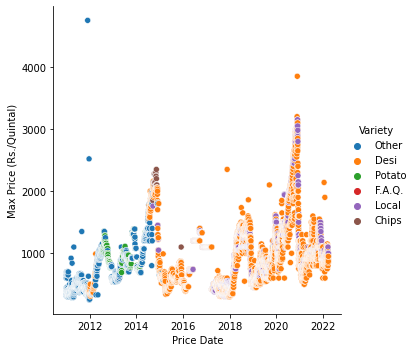

In [96]:
sns.relplot(data=Data, x= 'Price Date', y='Max Price (Rs./Quintal)', hue='Variety')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


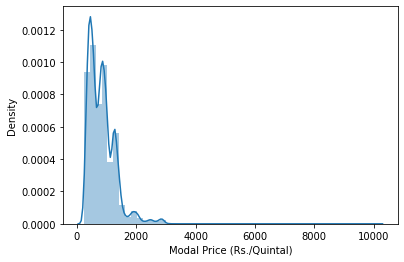

In [97]:
sns.distplot(Data['Modal Price (Rs./Quintal)'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


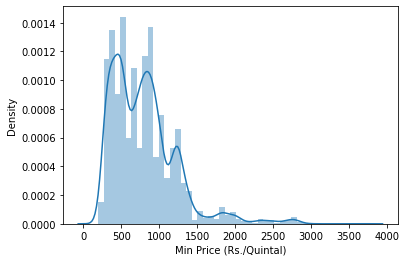

In [98]:
sns.distplot(Data['Min Price (Rs./Quintal)'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


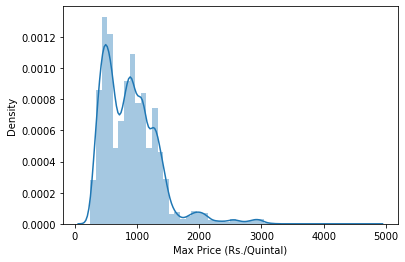

In [99]:
sns.distplot(Data['Max Price (Rs./Quintal)'])

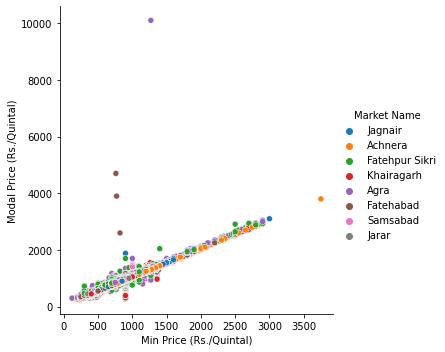

In [100]:
sns.relplot(data=Data, x= 'Min Price (Rs./Quintal)', y='Modal Price (Rs./Quintal)', hue='Market Name')

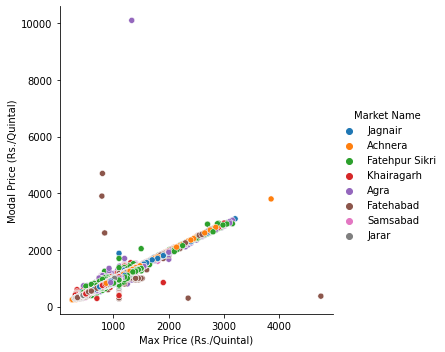

In [101]:
sns.relplot(data=Data, x= 'Max Price (Rs./Quintal)', y='Modal Price (Rs./Quintal)', hue='Market Name')

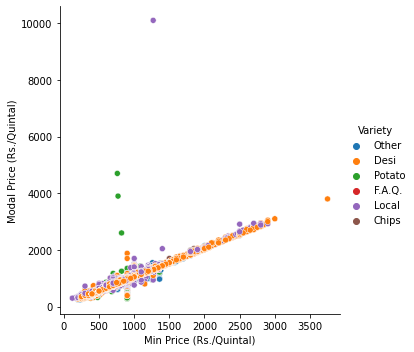

In [102]:
sns.relplot(data=Data, x= 'Min Price (Rs./Quintal)', y='Modal Price (Rs./Quintal)', hue='Variety')

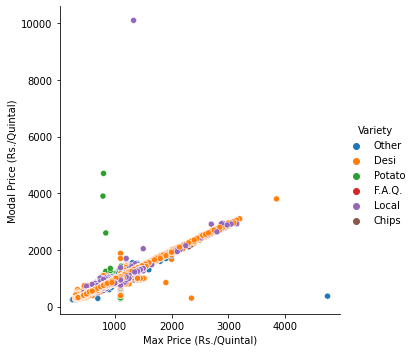

In [103]:
sns.relplot(data=Data, x= 'Max Price (Rs./Quintal)', y='Modal Price (Rs./Quintal)', hue='Variety')

In [104]:
labelencoder= LabelEncoder()
Data['Market Name'] = labelencoder.fit_transform(Data['Market Name']) 
Data['Variety'] = labelencoder.fit_transform(Data['Variety']) 
Data['Price Date'] = labelencoder.fit_transform(Data['Price Date'])

In [105]:
X=Data.drop(columns=['Modal Price (Rs./Quintal)'],axis=1)
y=Data['Modal Price (Rs./Quintal)']

In [106]:
print(X,y,X.dtypes,y.dtypes)

       Market Name  Variety  Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
113              4        4                    330.0                    400.0   
26               0        4                    320.0                    400.0   
88               3        4                    290.0                    315.0   
134              6        4                    500.0                    600.0   
25               0        4                    300.0                    400.0   
...            ...      ...                      ...                      ...   
14788            6        1                    750.0                    850.0   
14694            0        1                    780.0                    870.0   
14747            3        3                    700.0                   1000.0   
14769            4        1                    850.0                    950.0   
14719            1        1                    750.0                    950.0   

       Price Date  
113    

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [108]:
rfc = RandomForestRegressor(n_estimators=100)
rfc.fit(X_train, y_train)
print(rfc.score(X_train, y_train))
y_pred = rfc.predict(X_test)
print(metrics.mean_squared_error(y_test, y_pred))
metrics.r2_score(y_test, y_pred)

0.9919622698137536
591.3397918973666


0.9968675202593228

In [109]:
model = xg.XGBRegressor(n_estimators=100)
model.fit(X_train, y_train)
print(rfc.score(X_train, y_train))
y_pred = model.predict(X_test)
print(metrics.mean_squared_error(y_test, y_pred))
metrics.r2_score(y_test, y_pred)

[16:15:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9919622698137536
1653.9084993585266


0.9912388191389061